# embedding

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from plantclef.config import get_device

print(f"PyTorch Version: {torch.__version__}")
device = get_device()
print(f"Using device: {device}")

PyTorch Version: 2.6.0
Using device: cpu


In [3]:
import pandas as pd
from pathlib import Path

# Get list of stored filed in cloud bucket
root = Path().resolve().parents[0]
print(root)
! date

/Users/mgustineli/github/pytorch-plantclef
Wed Mar 19 10:33:06 EDT 2025


In [ ]:
# path to data
data_path = f"{root}/data/parquet/"
train_path = f"{data_path}/subset_top5_train"
test_path = f"{data_path}/test_2025_pytorch_webinar"

# read train data
train_df = pd.read_parquet(train_path)
test_df = pd.read_parquet(test_path)

# schema
print(train_df.shape)
display(train_df.head(3))
display(test_df.head(3))

(3760, 22)


species_id                                    image_name  \
0     1360257  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg   
1     1360257  a6d9a13ec26cbb04d61861ad5cb4ede8eb4d1ea3.jpg   
2     1360257  0fec55fc5105e512df08490ecbb55df3393d85c8.jpg   

                                                path  \
0  /PlantCLEF2024/train/1360257/5a4deafc321f2b653...   
1  /PlantCLEF2024/train/1360257/a6d9a13ec26cbb04d...   
2  /PlantCLEF2024/train/1360257/0fec55fc5105e512d...   

                                                data organ      obs_id  \
0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...  bark  1015292920   
1  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...  bark  1005087257   
2  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...  leaf  4111721487   

                                          license partner         author  \
0                                        cc-by-sa    None   Gabor Graehn   
1                                        cc-by-sa    None  Jacco Sanders   
2  http://creativecommons.org/licenses/by-nc/4.0/    None         imrsmf   

   altitude  ...  gbif_species_id               species     genus      family  \
0       NaN  ...        3039454.0  Frangula alnus Mill.  Frangula  Rhamnaceae   
1      51.0  ...        3039454.0  Frangula alnus Mill.  Frangula  Rhamnaceae   
2       NaN  ...        3039454.0  Frangula alnus Mill.  Frangula  Rhamnaceae   

    dataset    publisher                                         references  \
0  plantnet     plantnet  https://identify.plantnet.org/fr/k-southwester...   
1  plantnet     plantnet  https://identify.plantnet.org/fr/k-southwester...   
2      gbif  iNaturalist       https://www.inaturalist.org/photos/268971946   

                                                 url learn_tag  \
0  https://bs.plantnet.org/image/o/5a4deafc321f2b...     train   
1  https://bs.plantnet.org/image/o/a6d9a13ec26cbb...     train   
2  https://inaturalist-open-data.s3.amazonaws.com...     train   

                                    image_backup_url  
0  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...  
1  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...  
2  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...  

[3 rows x 22 columns]

image_name                                               path  \
0  RNNB-8-8-20240118.jpg  /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
1  RNNB-1-7-20230512.jpg  /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
2  RNNB-1-8-20230512.jpg  /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   

                                                data  
0  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...  
1  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...  
2  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...

### looking at some images

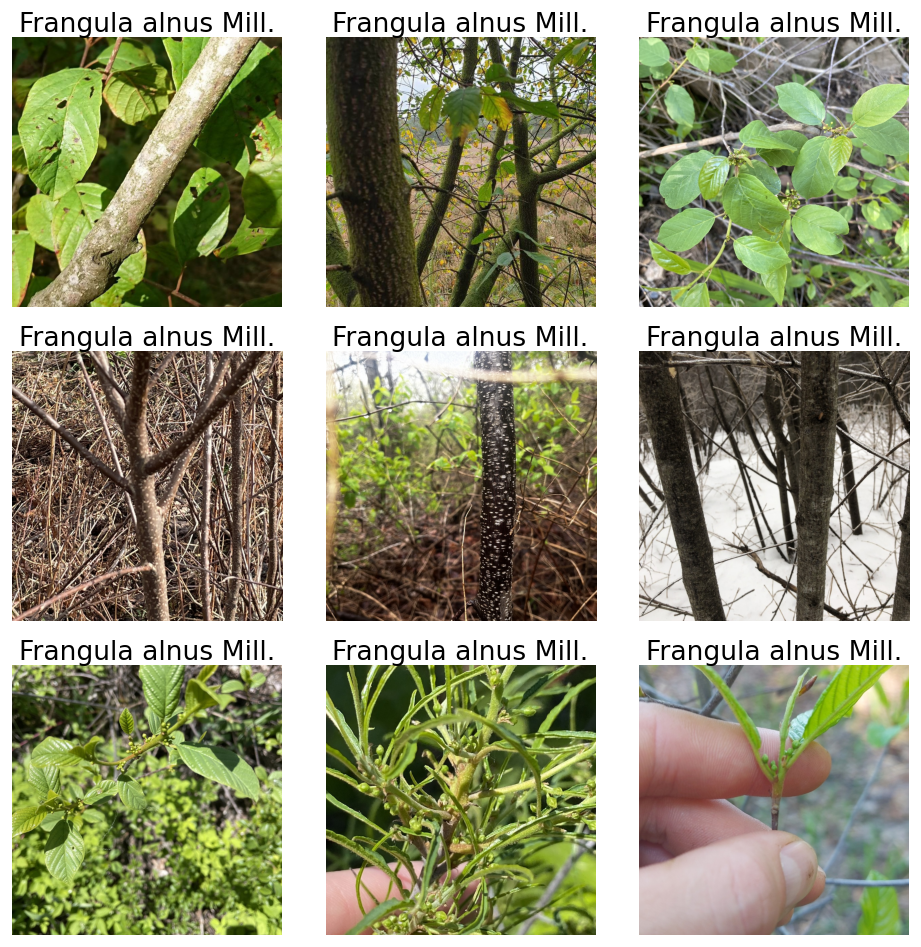

In [8]:
from plantclef.plotting import plot_images_from_binary


plot_images_from_binary(
    train_df,
    data_col="data",
    label_col="species",
    grid_size=(3, 3),
    crop_square=True,
    figsize=(8, 8),
    dpi=120,
)

In [9]:
# interesting test images
images = [
    "CBN-Pyr-03-20230706.jpg",
    "OPTMix-012-P2-207-20231201.jpg",
    "OPTMix-0178-P1-661-20231006.jpg",
    "OPTMix-0333-P2-115-20231212.jpg",
    "OPTMix-0598-P4-104-20231207.jpg",
    "RNNB-1-4-20240117.jpg",
    "RNNB-1-7-20230512.jpg",
    "RNNB-1-8-20230512.jpg",
    "RNNB-4-2-20240118.jpg",
    "RNNB-8-8-20240118.jpg",
    "CBN-can-E6-20230706.jpg",
    "CBN-Pla-A3-20140812.jpg",
]

In [12]:
# select subset of test dataframe
subset_test_df = test_df[test_df["image_name"].isin(images)]
subset_test_df.count()  # 12 images
subset_test_df.head(13)

image_name  \
0             RNNB-8-8-20240118.jpg   
1             RNNB-1-7-20230512.jpg   
2             RNNB-1-8-20230512.jpg   
3             RNNB-8-8-20240118.jpg   
4             RNNB-1-4-20240117.jpg   
5           CBN-Pyr-03-20230706.jpg   
6           CBN-can-E6-20230706.jpg   
7           CBN-Pla-A3-20140812.jpg   
8   OPTMix-0333-P2-115-20231212.jpg   
9    OPTMix-012-P2-207-20231201.jpg   
10            RNNB-4-2-20240118.jpg   
11  OPTMix-0178-P1-661-20231006.jpg   
12  OPTMix-0598-P4-104-20231207.jpg   

                                                 path  \
0   /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
1   /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
2   /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
3   /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
4   /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
5   /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
6   /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
7   /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
8   /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
9   /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
10  /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
11  /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
12  /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   

                                                 data  
0   b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...  
1   b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...  
2   b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...  
3   b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...  
4   b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...  
5   b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...  
6   b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...  
7   b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...  
8   b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...  
9   b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...  
10  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...  
11  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...  
12  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...

### extract embeddings from images

In [6]:
# limit to 5 samples for testing
limit_df = train_df.head(2)
print(f"Limit DF shape: {limit_df.shape}")

Limit DF shape: (2, 22)


In [7]:
from plantclef.embed.workflow import extract_embeddings

# extract embeddings
embeddings = extract_embeddings(
    limit_df,
    batch_size=2,
    use_grid=False,
    cpu_count=1,
)

Extracting embeddings: 100%|██████████| 1/1 [00:04<00:00,  4.11s/batch]


In [8]:
# embeddings shape
embeddings.shape

(2, 768)

In [9]:
# create embeddings dataframe
cols = ["image_name", "species", "species_id"]
embeddings_df = limit_df[cols].copy()
embeddings_df["embeddings"] = embeddings.tolist()
embeddings_df.head(2)

image_name               species  \
0  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
1  a6d9a13ec26cbb04d61861ad5cb4ede8eb4d1ea3.jpg  Frangula alnus Mill.   

   species_id                                         embeddings  
0     1360257  [-0.8239141702651978, 1.2448816299438477, 0.02...  
1     1360257  [-0.14528469741344452, -0.8409067988395691, -0...

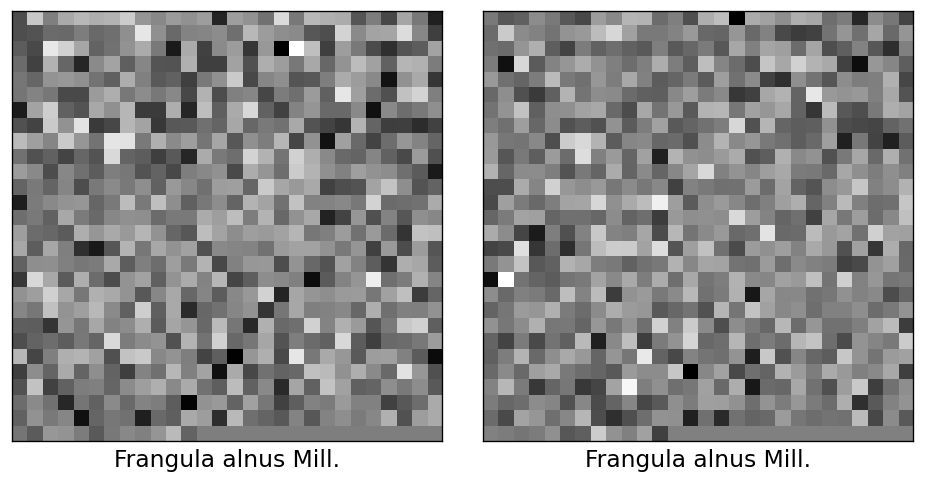

In [10]:
from plantclef.plotting import plot_embeddings

plot_embeddings(
    embeddings_df,
    data_col="embeddings",
    label_col="species",
    grid_size=(1, 2),
    figsize=(8, 4),
    dpi=120,
)

## grid of image tiles

In [11]:
# use grid to extract embeddings for each tile
USE_GRID = True
GRID_SIZE = 3

# extract embeddings
embeddings = extract_embeddings(
    limit_df,
    batch_size=2,
    use_grid=USE_GRID,
    grid_size=GRID_SIZE,
    cpu_count=1,
)

Extracting embeddings: 100%|██████████| 1/1 [00:08<00:00,  8.63s/batch]


In [12]:
# embeddings shape
embeddings.shape

(2, 9, 768)

In [13]:
# create embeddings dataframe
cols = ["image_name", "species", "species_id", "data"]
embeddings_df = limit_df[cols].copy()
embeddings_df["embeddings"] = embeddings.tolist()
embeddings_df.head(2)

image_name               species  \
0  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
1  a6d9a13ec26cbb04d61861ad5cb4ede8eb4d1ea3.jpg  Frangula alnus Mill.   

   species_id                                               data  \
0     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
1     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   

                                          embeddings  
0  [[-0.5858300924301147, -0.12547707557678223, 0...  
1  [[-0.0179920494556427, -0.5721642374992371, 0....

In [14]:
embeddings_df["embeddings"].apply(lambda x: len(x))

0    9
1    9
Name: embeddings, dtype: int64

In [15]:
# explode embeddings
explode_df = embeddings_df.explode("embeddings", ignore_index=True)
# assign tile number for each image
explode_df["tile"] = explode_df.groupby("image_name").cumcount()
explode_df.head(9)

image_name               species  \
0  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
1  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
2  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
3  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
4  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
5  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
6  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
7  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
8  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   

   species_id                                               data  \
0     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
1     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
2     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
3     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
4     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
5     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
6     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
7     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
8     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   

                                          embeddings  tile  
0  [-0.5858300924301147, -0.12547707557678223, 0....     0  
1  [-0.4382806122303009, -0.7402958273887634, 0.0...     1  
2  [-0.7558999061584473, 0.8920708894729614, -1.0...     2  
3  [-0.686843752861023, 0.21441468596458435, -0.3...     3  
4  [0.03154247999191284, 1.341550588607788, -1.05...     4  
5  [-0.45235031843185425, 0.22192221879959106, -0...     5  
6  [-0.2614886164665222, 1.9578287601470947, -0.8...     6  
7  [-1.4218535423278809, -0.16190171241760254, -0...     7  
8  [0.026297181844711304, -0.2350459098815918, -0...     8

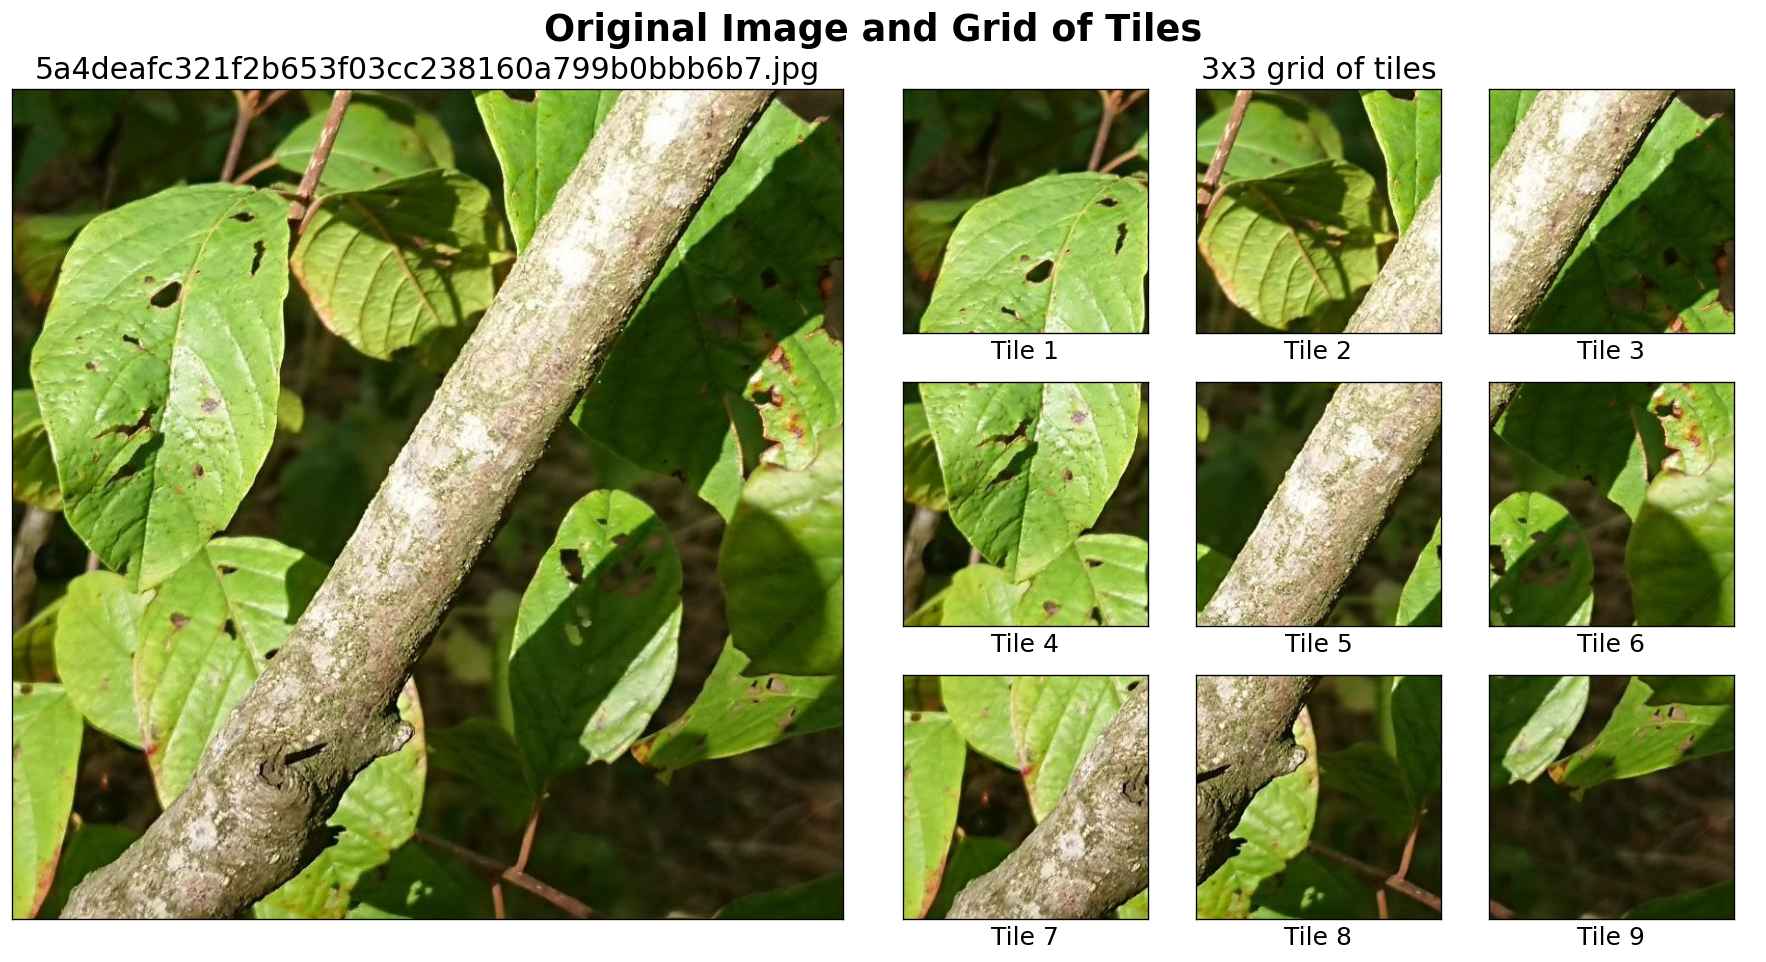

In [16]:
from plantclef.plotting import plot_image_tiles

plot_image_tiles(
    embeddings_df,
    data_col="data",
    grid_size=3,
    figsize=(15, 8),
    dpi=120,
)